## Assignment 3: $k$ Nearest Neighbor and $k$ Means Clustering

## **Do three questions.**

`! git clone https://www.github.com/DS3001/knn`

**Q1.** This question is a case study for $k$ nearest neighbor. The target variable `y` is `Purchase` and the features of interest are `Age` and `AnnualSalary`.

1. Load the `./data/car_data.csv` data. Look at the head and dimensions of the data.
2. Summarize the variables (`User.ID`, `Gender`, `Age`, `AnnualSalary`, `Purchase`). Are there any missings to clean? Convert the `Gender` categorical variable into a dummy variable that takes the value 0 for male and 1 for female. Create a matrix $X$ of predictors including `Age` and `AnnualSalary`, and an outcome $y$ equaling `Purchase`.
3. MaxMin-normalize `Age` and `AnnualSalary` in `X`.
4. Split the sample into a ~80% training dataset and a ~20% testing dataset.
5. Treat this as a classification problem: The model is supposed to predict 0 or 1 for each customer, classifying them as a purchaser or non-purchaser. Use sklearn to determine the optimal number of neighbors $k$ to use.
6. Run the model for the optimal number of neighbors on the testing data. Cross tabulate the predicted outcomes against the actual outcomes; this is called a **confusion matrix**. How often does the model predict a sale when one fails to occur? How often does the model predict no sale when one does occur? Overall, does it provide accurate predictions?
7. Now, compute confusion matrices separately for men and women, as in part 6. Does the model make more accurate predictions for one sex or the other? Explain. (Performance of algorithms on population subgroups is a growing topic in data science.)

In [2]:
# NOTE: PART 1 HERE
import pandas as pd

data_for_cars = pd.read_csv('data/car_data.csv')
print(data_for_cars.head())
print(f'The car data shape is {data_for_cars.shape}')




   User ID Gender  Age  AnnualSalary  Purchased
0      385   Male   35         20000          0
1      681   Male   40         43500          0
2      353   Male   49         74000          0
3      895   Male   40        107500          1
4      661   Male   25         79000          0
The car data shape is (1000, 5)


In [3]:
#NOTE: PART 2 HERE

car_summary = data_for_cars.describe()
data_for_cars_missing_vals = data_for_cars.isnull().sum()

data_for_cars['Gender'] = data_for_cars['Gender'].map({'Male': 0, 'Female': 1})

X = data_for_cars[['Age', 'AnnualSalary']]
Y = data_for_cars['Purchased']

print(car_summary)

print(f'The number of missing values is \n{data_for_cars_missing_vals}')


           User ID          Age   AnnualSalary    Purchased
count  1000.000000  1000.000000    1000.000000  1000.000000
mean    500.500000    40.106000   72689.000000     0.402000
std     288.819436    10.707073   34488.341867     0.490547
min       1.000000    18.000000   15000.000000     0.000000
25%     250.750000    32.000000   46375.000000     0.000000
50%     500.500000    40.000000   72000.000000     0.000000
75%     750.250000    48.000000   90000.000000     1.000000
max    1000.000000    63.000000  152500.000000     1.000000
The number of missing values is 
User ID         0
Gender          0
Age             0
AnnualSalary    0
Purchased       0
dtype: int64


In [24]:
#NOTE: PART 3 HERE

X_norm = X.copy()
X_norm['Age'] = (X['Age'] - X['Age'].min()) / (X['Age'].max() - X['Age'].min())
X_norm['AnnualSalary'] = (X['AnnualSalary'] - X['AnnualSalary'].min()) / (X['AnnualSalary'].max() - X['AnnualSalary'].min())

print(X_norm.head())
print(X_norm.describe())


        Age  AnnualSalary
0  0.377778      0.036364
1  0.488889      0.207273
2  0.688889      0.429091
3  0.488889      0.672727
4  0.155556      0.465455
               Age  AnnualSalary
count  1000.000000   1000.000000
mean      0.491244      0.419556
std       0.237935      0.250824
min       0.000000      0.000000
25%       0.311111      0.228182
50%       0.488889      0.414545
75%       0.666667      0.545455
max       1.000000      1.000000


In [5]:
#NOTE: PART 4 HERE
from sklearn.model_selection import train_test_split


X_train, X_test, Y_train, Y_test = train_test_split(X_norm, Y, test_size=0.20, train_size=0.8, random_state=42 )


In [6]:
#NOTE: PART 5 HERE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html

k_values = range(1,60)
accuracy_scores = []

for k in k_values:
    knn = KNeighborsClassifier(k)
    knn.fit(X_train, Y_train)
    y_predictions = knn.predict(X_test)
    accuracy_scores.append(accuracy_score(Y_test, y_predictions))

opt_k = k_values[accuracy_scores.index(max(accuracy_scores))]
print(f"The optimal K value is {opt_k} with an accuracy score of {max(accuracy_scores)}")

The optimal K value is 7 with an accuracy score of 0.925


In [7]:
#NOTE: PART 6 HERE
from sklearn.metrics import confusion_matrix

knn_opt = KNeighborsClassifier(opt_k)
knn_opt.fit(X_train, Y_train)
y_pred_opt = knn_opt.predict(X_test)

confusion_mat = confusion_matrix(Y_test, y_pred_opt)
confusion_df = pd.DataFrame(confusion_mat, columns=["Predicted No Purchase", "Predicted Purchase"], 
                            index = ["Actual No Purchase", "Actual Purchase"])

print(confusion_df)
print("""Answers to How often does the model predict a sale when one fails to occur? 
      How often does the model predict no sale when one does occur? 
      Overall, does it provide accurate predictions?""")

print("The model predicts a purchase when one purchase fails to occur 6 times")
print("The model predicts a no sale when one does occur 9 times")
print("The prediction accuracy is 185/200 results correct which is a prediction accuracy of 92.5 percent")



                    Predicted No Purchase  Predicted Purchase
Actual No Purchase                    106                   6
Actual Purchase                         9                  79
Answers to How often does the model predict a sale when one fails to occur? 
      How often does the model predict no sale when one does occur? 
      Overall, does it provide accurate predictions?
The model predicts a purchase when one purchase fails to occur 6 times
The model predicts a no sale when one does occur 9 times
The prediction accuracy is 185/200 results correct which is a prediction accuracy of 92.5 percent


In [8]:
#NOTE: PART 7 HERE

gender_check = data_for_cars['Gender'][Y_test.index]

X_test_male = X_test[gender_check == 0]
y_test_male = Y_test[gender_check == 0]

X_test_female = X_test[gender_check == 1]
y_test_female = Y_test[gender_check == 1]

y_pred_male = knn_opt.predict(X_test_male)
confusion_male_matrix = confusion_matrix(y_test_male, y_pred_male)
confusion_df_male = pd.DataFrame(confusion_male_matrix, columns=["Predicted No Purchase", "Predicted Purchase"], 
                                 index=["Actual No Purchase", "Actual Purchase"])

y_pred_female = knn_opt.predict(X_test_female)
confusion_female_matrix = confusion_matrix(y_test_female, y_pred_female)
confusion_df_female = pd.DataFrame(confusion_female_matrix, columns=["Predicted No Purchase", "Predicted Purchase"], 
                                   index=["Actual No Purchase", "Actual Purchase"])

print("This is the male confusion matrix")
print(confusion_df_male)
print("\n")
print("This is the female confusion matrix")
print(confusion_df_female)
print("\n")
print("The male confusion matrix is 94.9 percent accurate")
print("The female confusion matrix is 90.2 percent accurate.")
print("""The model seems to be slightly more accurate for males than females. The difference is almost 5 percent in this case.
    In this case, the algorithm or the data might be more skewed towards an easier prediction for males. 
    This data demonstrates the idea that the performance of algorithms on different subpopulations is important as it will 
    help provide for fairness and effectiveness across different diversities.  """)


This is the male confusion matrix
                    Predicted No Purchase  Predicted Purchase
Actual No Purchase                     58                   2
Actual Purchase                         3                  35


This is the female confusion matrix
                    Predicted No Purchase  Predicted Purchase
Actual No Purchase                     48                   4
Actual Purchase                         6                  44


The male confusion matrix is 94.9 percent accurate
The female confusion matrix is 90.2 percent accurate.
The model seems to be slightly more accurate for males than females. The difference is almost 5 percent in this case.
    In this case, the algorithm or the data might be more skewed towards an easier prediction for males. 
    This data demonstrates the idea that the performance of algorithms on different subpopulations is important as it will 
    help provide for fairness and effectiveness across different diversities.  


**Q2.** This question is a case study for $k$ nearest neighbor The target variable `y` is `price` and the features are `year` and `mileage`.

1. Load the `./data/USA_cars_datasets.csv`. Keep the following variables and drop the rest: `price`, `year`, `mileage`. Are there any `NA`'s to handle? Look at the head and dimensions of the data.
2. Maxmin normalize `year` and `mileage`.
3. Split the sample into ~80% for training and ~20% for evaluation.
4. Use the $k$NN algorithm for regression and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$. For each value of $k$, compute the Sum of Squared Error and make a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase $k$?
5. Determine the optimal $k$ for these data.
6. Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

In [9]:
# NOTE: PART 1 HERE

import pandas as pd

car_data = pd.read_csv('data/USA_cars_datasets.csv')

subset_car_data = car_data[['price', 'year', 'mileage']]

car_missing_vals = subset_car_data.isnull().sum()

print(f"This is the number of missing values: \n{car_missing_vals}")\

print("There are no missing values in the car dataset.")

print(car_data.head())
print(f"The car data shape is {car_data.shape}")


This is the number of missing values: 
price      0
year       0
mileage    0
dtype: int64
There are no missing values in the car dataset.
   Unnamed: 0  price      brand    model  year   title_status  mileage  \
0           0   6300     toyota  cruiser  2008  clean vehicle   274117   
1           1   2899       ford       se  2011  clean vehicle   190552   
2           2   5350      dodge      mpv  2018  clean vehicle    39590   
3           3  25000       ford     door  2014  clean vehicle    64146   
4           4  27700  chevrolet     1500  2018  clean vehicle     6654   

    color                  vin        lot       state country      condition  
0   black    jtezu11f88k007763  159348797  new jersey     usa   10 days left  
1  silver    2fmdk3gc4bbb02217  166951262   tennessee     usa    6 days left  
2  silver    3c4pdcgg5jt346413  167655728     georgia     usa    2 days left  
3    blue    1ftfw1et4efc23745  167753855    virginia     usa  22 hours left  
4     red    3gcpcrec

In [10]:
# NOTE: PART 2 HERE

car_data['year'] = (car_data['year'] - car_data['year'].min()) / (car_data['year'].max() - car_data['year'].min())
car_data['mileage'] = (car_data['mileage'] - car_data['mileage'].min()) / (car_data['mileage'].max() - car_data['mileage'].min())

print(car_data.head())


   Unnamed: 0  price      brand    model      year   title_status   mileage  \
0           0   6300     toyota  cruiser  0.744681  clean vehicle  0.269287   
1           1   2899       ford       se  0.808511  clean vehicle  0.187194   
2           2   5350      dodge      mpv  0.957447  clean vehicle  0.038892   
3           3  25000       ford     door  0.872340  clean vehicle  0.063016   
4           4  27700  chevrolet     1500  0.957447  clean vehicle  0.006537   

    color                  vin        lot       state country      condition  
0   black    jtezu11f88k007763  159348797  new jersey     usa   10 days left  
1  silver    2fmdk3gc4bbb02217  166951262   tennessee     usa    6 days left  
2  silver    3c4pdcgg5jt346413  167655728     georgia     usa    2 days left  
3    blue    1ftfw1et4efc23745  167753855    virginia     usa  22 hours left  
4     red    3gcpcrec2jg473991  167763266     florida     usa  22 hours left  


In [11]:
# NOTE: PART 3 HERE
from sklearn.model_selection import train_test_split

X_vals = car_data[["year", "mileage"]]
Y_vals = car_data[["price"]]

X_train, X_test, Y_train, Y_test = train_test_split(X_vals, Y_vals, test_size=0.20, train_size=0.8, random_state=42 )

print(X_train.shape)
print(Y_train.shape)


(1999, 2)
(1999, 1)


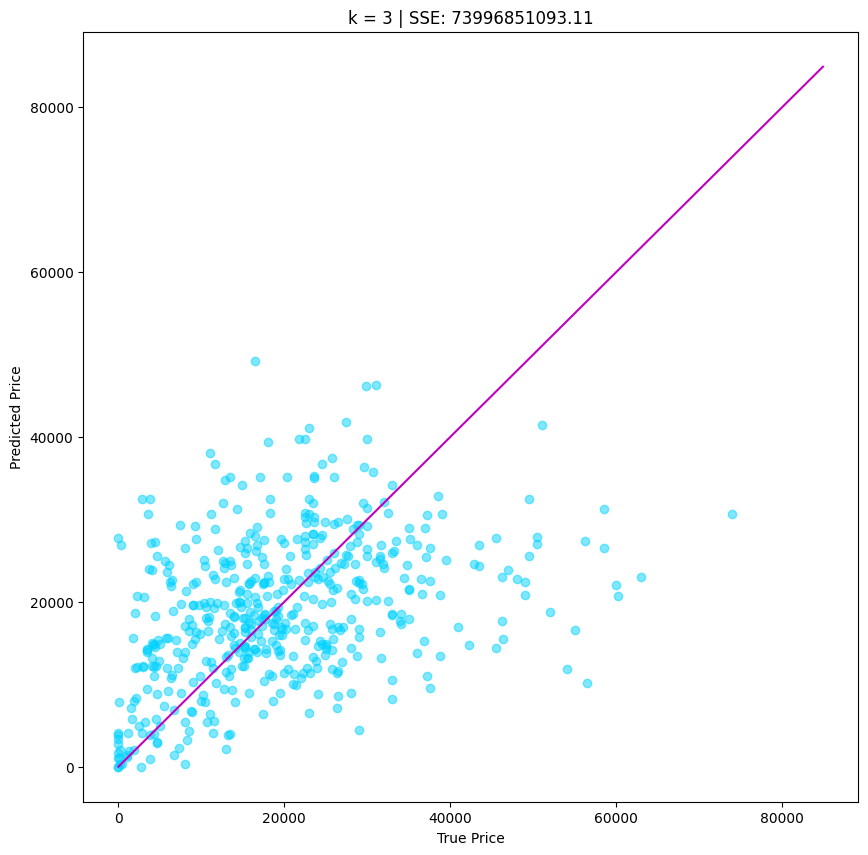

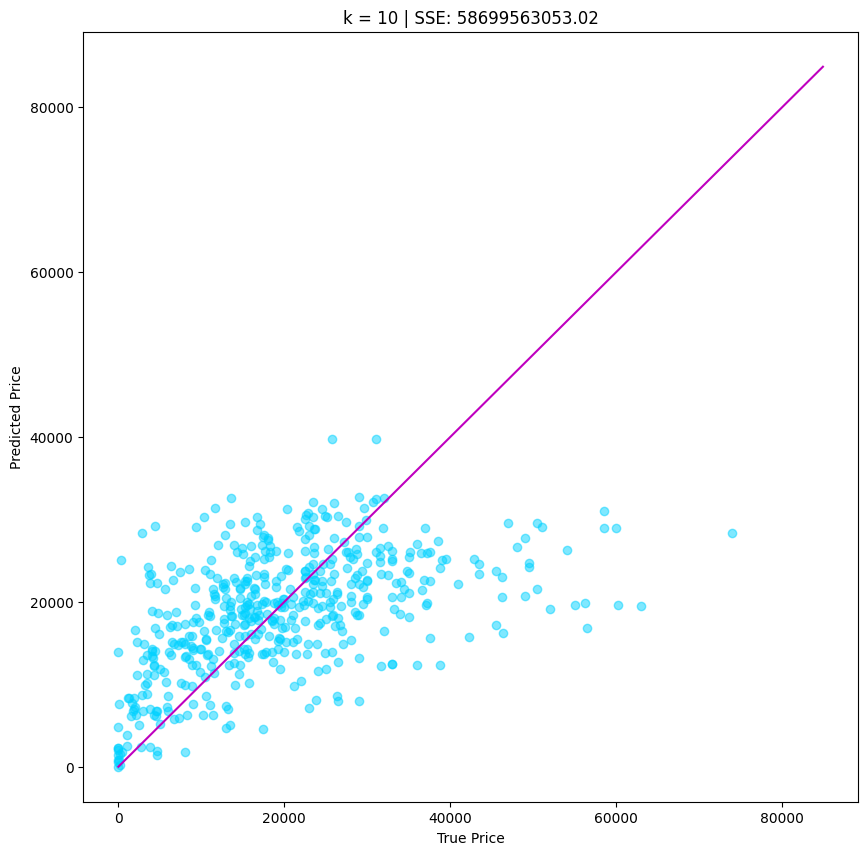

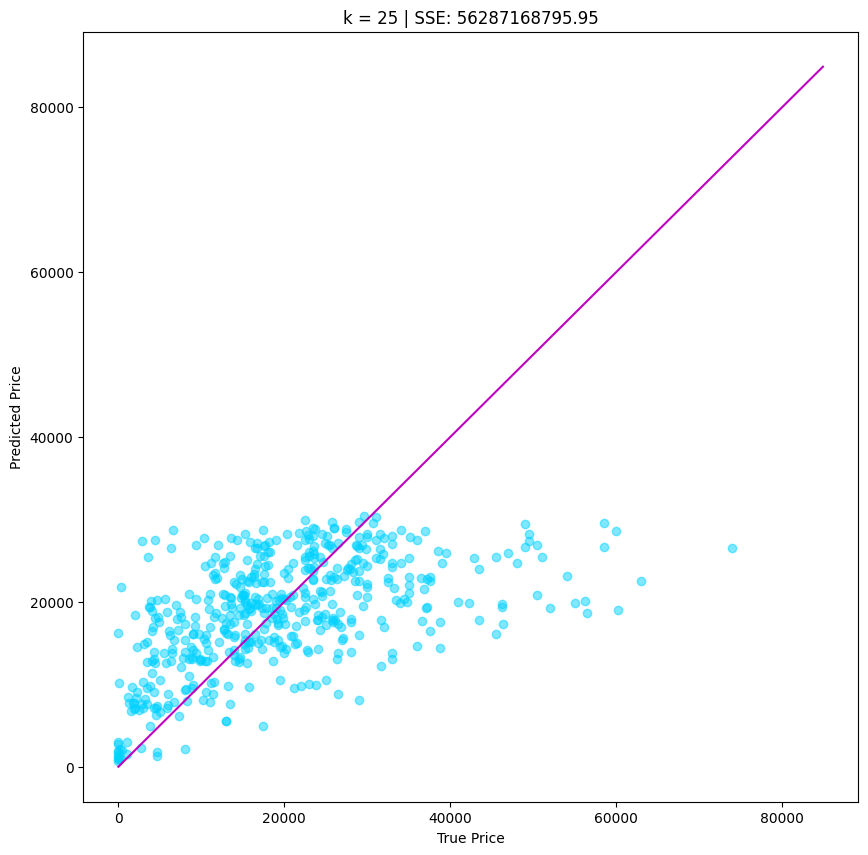

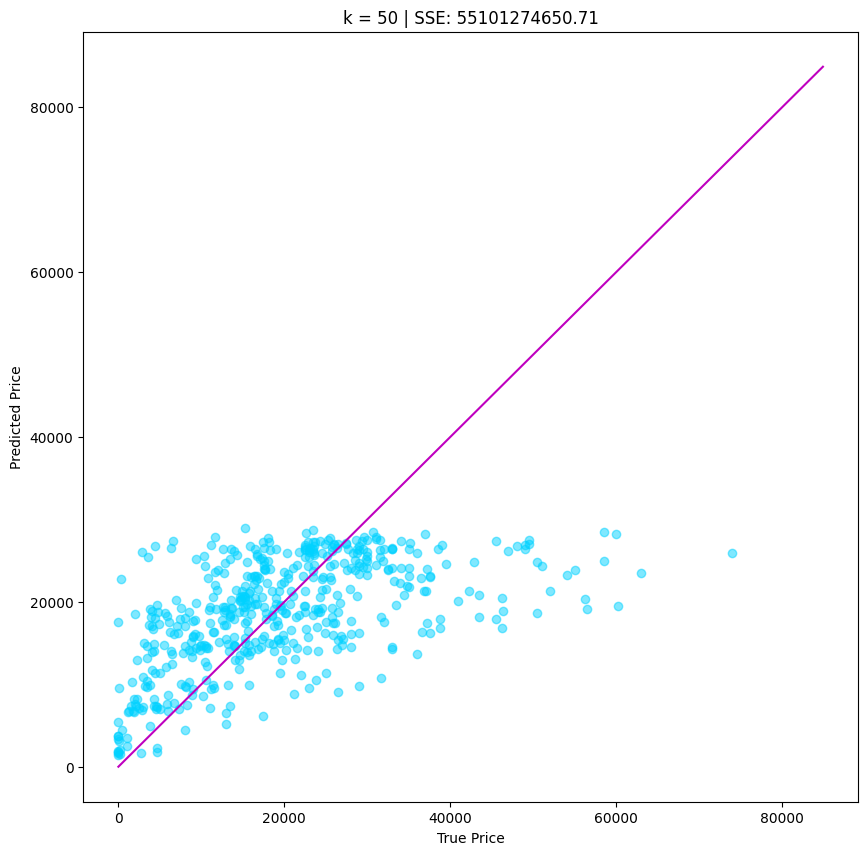

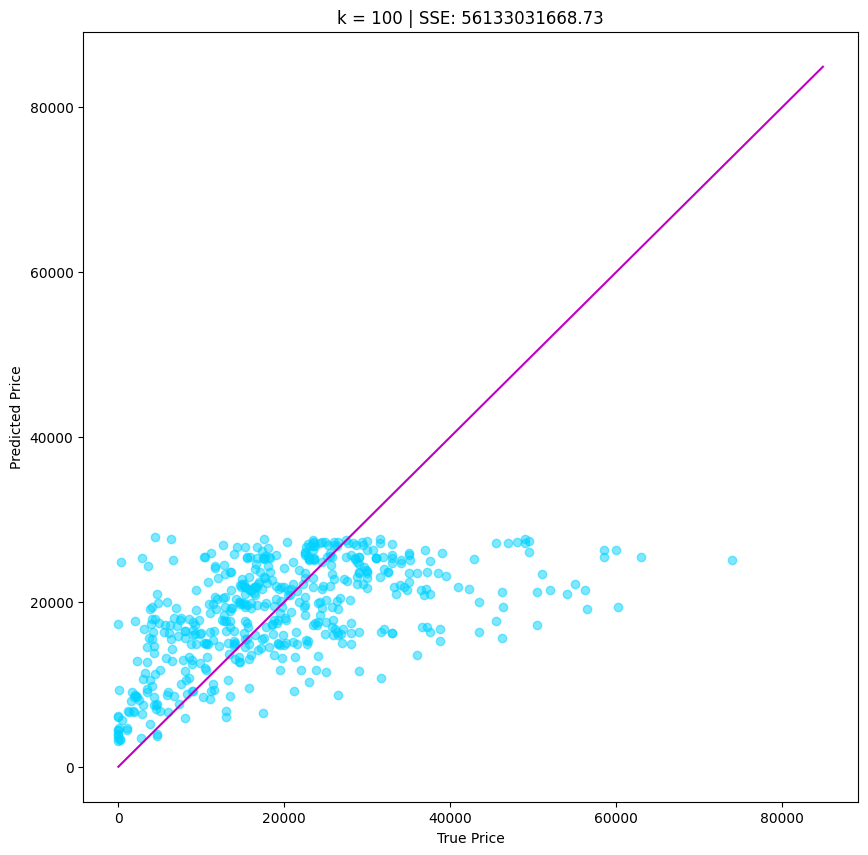

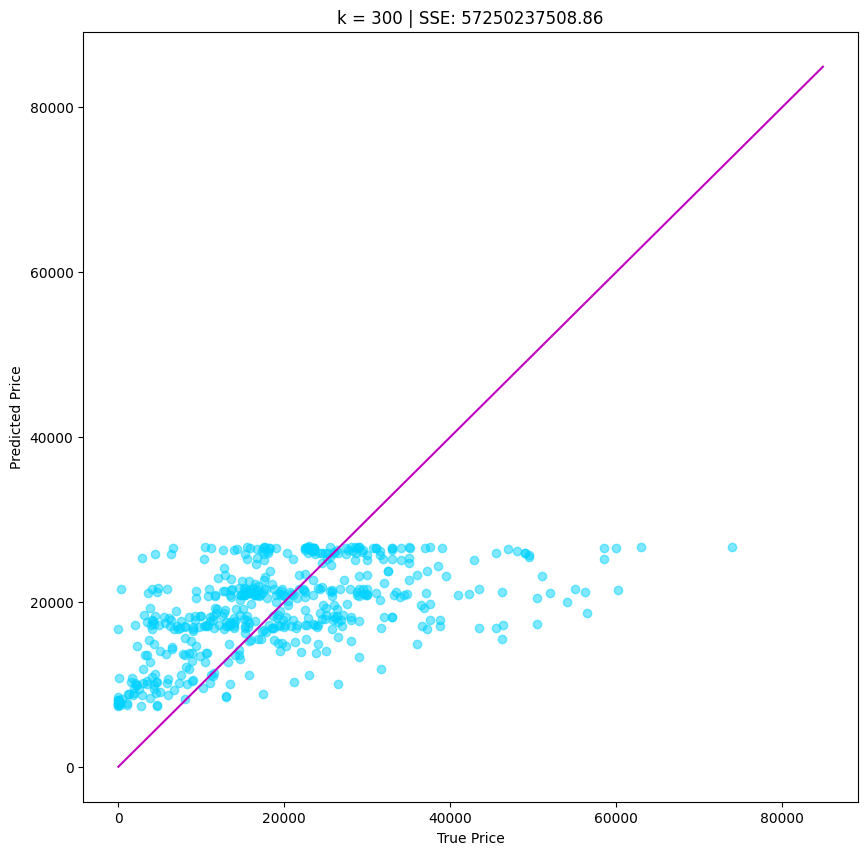


    Some of the trends that I am noticing from these prices is that in the lower k values (k=3 and k=10), the predictions seem to overfit
    the data. As a result, the SSE value is very high and the graph tends to match the plot more. As k increases (to k=25 and k=50), 
    the predictions start to become more even, and the model performance seems to improve. As k increases even further (to k=100 and k=300), 
    the model seems to underfit the data and the SSE starts to become larger again. 



In [12]:
# NOTE: PART 4 HERE
from sklearn.neighbors import KNeighborsRegressor

import matplotlib.pyplot as plt

k_vals = [3,10,25,50,100,300]
res = []

for k in k_vals:
    knn_regressor = KNeighborsRegressor(n_neighbors=k)
    knn_regressor.fit(X_train, Y_train)
    y_predictions = knn_regressor.predict(X_test)
    sse = ((Y_test - y_predictions) ** 2).sum()
    res.append((k, y_predictions, sse))

for k, y_predictions, sse in res:
    sse_scalar_val = sse.item()
    plt.figure(figsize=(10,10))
    plt.scatter(Y_test, y_predictions, alpha=0.5, color="#00d2ff")
    plt.plot([Y_vals.min(), Y_vals.max()], [Y_vals.min(), Y_vals.max()], 'm-')
    plt.title(f'k = {k} | SSE: {sse_scalar_val:.2f}')
    plt.xlabel("True Price")
    plt.ylabel("Predicted Price")
    plt.show()


print("""
    Some of the trends that I am noticing from these prices is that in the lower k values (k=3 and k=10), the predictions seem to overfit
    the data. As a result, the SSE value is very high and the graph tends to match the plot more. As k increases (to k=25 and k=50), 
    the predictions start to become more even, and the model performance seems to improve. As k increases even further (to k=100 and k=300), 
    the model seems to underfit the data and the SSE starts to become larger again. 
""")



In [13]:
#NOTE: PART 5 HERE
# TO GET BEST SSE VAL, JUST FIND MIN IN SSE VALUES

sse_vals = [sse.item() for _,_,sse in res]
opt_k = k_vals[sse_vals.index(min(sse_vals))]
print(f"The optimal k value is {opt_k} with an sse value of {min(sse_vals)}")



The optimal k value is 50 with an sse value of 55101274650.7148


In [14]:
#NOTE: PART 6 HERE

print("""
    For smaller k values, the model is sensitive to changes in the training data. This leads to overfitting where the model takes in the noise
    for the training data and doesn't generalize well to new data. As k increases, the model starts to level out/average and the predictions
    become more stable. When the k values become extremely large (like the k=100 or k=300), the model tends to underfit the data. It becomes 
    generalized and predicts values closer to the mean. 
""")



    For smaller k values, the model is sensitive to changes in the training data. This leads to overfitting where the model takes in the noise
    for the training data and doesn't generalize well to new data. As k increases, the model starts to level out/average and the predictions
    become more stable. When the k values become extremely large (like the k=100 or k=300), the model tends to underfit the data. It becomes 
    generalized and predicts values closer to the mean. 



**Q3.** This question is a case study for $k$ nearest neighbor, particularly variable selection. The data for the question include (summaries reproduced here directly from the codebook):

- age: age of the patient (years)
- anaemia: decrease of red blood cells or hemoglobin (boolean)
- high blood pressure: if the patient has hypertension (boolean)
- creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L)
- diabetes: if the patient has diabetes (boolean)
- ejection fraction: percentage of blood leaving the heart at each contraction (percentage)
- platelets: platelets in the blood (kiloplatelets/mL)
- sex: woman or man (binary)
- serum creatinine: level of serum creatinine in the blood (mg/dL)
- serum sodium: level of serum sodium in the blood (mEq/L)
- smoking: if the patient smokes or not (boolean)
- time: follow-up period (days)
- death event: if the patient deceased during the follow-up period (boolean)

1. Load the `./data/heart_failure_clinical_records_dataset.csv`. Are there any `NA`'s to handle? use `.drop()` to remove `time` from the dataframe.
2. Make a correlation matrix. What variables are strongly associated with a death event?
3. For the dummy variables `anaemia`, `diabetes`, `high_blood_pressure`, `sex`, and `smoking`, compute a summary table of `DEATH_EVENT` grouped by the variable. For which variables does a higher proportion of the population die when the variable takes the value 1 rather than 0?
4. On the basis of your answers from 2 and 3, build a matrix $X$ of the variables you think are most predictive of a death, and a variable $y$ equal to `DEATH_EVENT`.
5. Maxmin normalize all of the variables in `X`.
6. Split the sample into ~80% for training and ~20% for evaluation. (Try to use the same train/test split for the whole question, so that you're comparing apples to apples in the questions below.).
7. Determine the optimal number of neighbors for a $k$NN regression for the variables you selected.
8. OK, do steps 5 through 7 again, but use all of the variables (except `time`). Which model has a lower Sum of Squared Error? Which would you prefer to use in practice, if you had to predict `DEATH_EVENT`s? If you play with the selection of variables, how much does the SSE change for your fitted model on the test data? Are more variables better, in this case? Explain your findings.

In [15]:
# NOTE: PART 1 HERE

import pandas as pd

clinical_data = pd.read_csv('data/heart_failure_clinical_records_dataset.csv')

clinical_na_check = clinical_data.isna().sum()

clinical_data = clinical_data.drop('time', axis=1)

print(f"The number of na's in this dataset for each column are \n{clinical_na_check}")


The number of na's in this dataset for each column are 
age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64


In [16]:
#NOTE: PART 2 HERE

corr_matrix = clinical_data.corr()

strong_associations = corr_matrix['DEATH_EVENT'].sort_values(ascending=False)

print(strong_associations)
print("\n")
print("The variables strongly correlated with a death event seem to be serum_creatinine and age")

DEATH_EVENT                 1.000000
serum_creatinine            0.294278
age                         0.253729
high_blood_pressure         0.079351
anaemia                     0.066270
creatinine_phosphokinase    0.062728
diabetes                   -0.001943
sex                        -0.004316
smoking                    -0.012623
platelets                  -0.049139
serum_sodium               -0.195204
ejection_fraction          -0.268603
Name: DEATH_EVENT, dtype: float64


The variables strongly correlated with a death event seem to be serum_creatinine and age


In [17]:
#NOTE: PART 3 HERE 
dummy_vars = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']

summary_tables = {}

for var in dummy_vars:
    summary_tables[var] = clinical_data.groupby(var)['DEATH_EVENT'].mean()

print(summary_tables)
print("""
    A higher proportion of the population dies when the variable takes the value 1 for high blood pressure and anaemia.
""")


{'anaemia': anaemia
0    0.294118
1    0.356589
Name: DEATH_EVENT, dtype: float64, 'diabetes': diabetes
0    0.321839
1    0.320000
Name: DEATH_EVENT, dtype: float64, 'high_blood_pressure': high_blood_pressure
0    0.293814
1    0.371429
Name: DEATH_EVENT, dtype: float64, 'sex': sex
0    0.323810
1    0.319588
Name: DEATH_EVENT, dtype: float64, 'smoking': smoking
0    0.325123
1    0.312500
Name: DEATH_EVENT, dtype: float64}

    A higher proportion of the population dies when the variable takes the value 1 for high blood pressure and anaemia.



In [18]:
#NOTE: PART 4 HERE

X_vals = clinical_data[['serum_creatinine', 'age', 'anaemia', 'high_blood_pressure']]
Y_vals = clinical_data['DEATH_EVENT']



In [19]:
# NOTE: PART 5 HERE

X_normalized = (X_vals - X_vals.min()) / (X_vals.max() - X_vals.min())
X_normalized.head()

,serum_creatinine,age,anaemia,high_blood_pressure
0,0.157303,0.636364,0.0,1.0
1,0.067416,0.272727,0.0,0.0
2,0.089888,0.454545,0.0,0.0
3,0.157303,0.181818,1.0,0.0
4,0.247191,0.454545,1.0,0.0


In [20]:
#NOTE: PART 6 HERE
from sklearn.model_selection import train_test_split

X_train, X_eval, y_train, y_eval = train_test_split(X_normalized, Y_vals, test_size=0.2, random_state=42)

print(X_train)
print(X_eval)
print(y_train)
print(y_eval)


     serum_creatinine       age  anaemia  high_blood_pressure
6            0.078652  0.636364      1.0                  0.0
183          0.224719  0.636364      0.0                  1.0
185          0.112360  0.375764      1.0                  0.0
146          0.022472  0.218182      0.0                  0.0
30           0.149438  0.981818      0.0                  1.0
..                ...       ...      ...                  ...
188          0.056180  0.375764      1.0                  1.0
71           0.044944  0.327273      0.0                  0.0
106          0.089888  0.272727      0.0                  0.0
270          0.123596  0.072727      0.0                  1.0
102          0.067416  0.727273      0.0                  0.0

[239 rows x 4 columns]
     serum_creatinine       age  anaemia  high_blood_pressure
281          0.247191  0.545455      0.0                  0.0
265          0.044944  0.181818      1.0                  0.0
164          0.067416  0.090909      0.0      

In [21]:
# NOTE: PART 7 HERE

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

k_values = range(1, 60)

mse_values = []

for k in k_values:
    knn = KNeighborsRegressor(k)
    knn.fit(X_train, y_train)
    predictions = knn.predict(X_eval)
    mse = mean_squared_error(y_eval, predictions)
    mse_values.append(mse)

opt_k = k_values[mse_values.index(min(mse_values))]

print(f'The optimal k value is {opt_k} with an mse value of {min(mse_values)}')



The optimal k value is 59 with an mse value of 0.25603753710619553


In [22]:
#NOTE: PART 8 HERE
#NOTE: NOT ALL OF THE PRINT STATEMENTS WERE PRINTED OUT. PLEASE VIEW THE ENTIRE THING TO SEE IT

X_all = clinical_data.drop(columns=['DEATH_EVENT'])
x_all_norm = (X_all - X_all.min()) / (X_all.max() - X_all.min())


X_train_all, X_eval_all, _, _ = train_test_split(x_all_norm, Y_vals, test_size=0.2, random_state=42)

print(X_train_all)

mse_values_all = []

for k in k_values:
    knn = KNeighborsRegressor(k)
    knn.fit(X_train_all, y_train)
    predictions_all = knn.predict(X_eval_all)
    mse_all = mean_squared_error(y_eval, predictions_all)
    mse_values_all.append(mse_all)

opt_k_all = k_values[mse_values_all.index(min(mse_values_all))]

print(f"The new optimal k value is {opt_k_all} with a mse of {min(mse_values_all)}")

knn_selected = KNeighborsRegressor(n_neighbors=opt_k)
knn_selected.fit(X_train, y_train)
predictions_selected = knn_selected.predict(X_eval)
sse_selected_loop = 0
predictions_selected_loop = knn_selected.predict(X_eval)
for pred, true in zip(predictions_selected_loop, y_eval):
    sse_selected_loop += (pred - true) ** 2


knn_all = KNeighborsRegressor(n_neighbors=opt_k_all)
knn_all.fit(X_train_all, y_train)
predictions_all = knn_all.predict(X_eval_all)
sse_all_loop = 0
for pred, true in zip(predictions_all, y_eval):
    sse_all_loop += (pred - true) ** 2

print("\n")

print(f'The sse of the model using all variables is {sse_all_loop} and the sse of the model using the selected variables is {sse_selected_loop}')
print("As we can see, the model using all variables has a lower sse when compared to the ones with selected variables")

print("""In practice, if I wanted performance, I would choose the model using all variables. However, using the model with all variables
     can cause overfitting as well. The simpler model might be less prone to overfitting """)

print("""When using different selections of variables, the sse can vary a bit depending on the combinations of variables. There was a difference
      of around 2 in sse values with all the variables and the selected variables models.""")

print("In this case, using more variables was better. However, I did not test all the combinations of variables so it is not certain that using more variables was better.")

print("""In terms of overall findings, I found that feature selection was pretty important in order to minimize the sse. 
      I also found that more features might lead to more noise and overfitting. A simple model might be better for interpretation.""")


          age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
6    0.636364      1.0                  0.028451       0.0           0.015152   
183  0.636364      0.0                  0.009696       0.0           0.363636   
185  0.375764      1.0                  0.010334       1.0           0.242424   
146  0.218182      0.0                  0.013907       0.0           0.242424   
30   0.981818      0.0                  0.071319       1.0           0.363636   
..        ...      ...                       ...       ...                ...   
188  0.375764      1.0                  0.016331       1.0           0.393939   
71   0.327273      0.0                  0.071319       1.0           0.318182   
106  0.272727      0.0                  0.092498       0.0           0.469697   
270  0.072727      0.0                  0.071319       1.0           0.242424   
102  0.727273      0.0                  0.111636       0.0           0.166667   

     high_blood_pressure  p

**Q4.** Let's do some very basic computer vision. We're going to import the MNIST handwritten digits data and $k$NN to predict values (i.e. "see/read").

1. To load the data, run the following code in a chunk:
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5): 
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?
3. Use Numpy's `.reshape()` method to covert the training and testing data from a matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).
4. Use the reshaped `X_test` and `y_test` data to create a $k$-nearest neighbor classifier of digit. What is the optimal number of neighbors $k$? If you can't determine this, play around with different values of $k$ for your classifier.
5. For the optimal number of neighbors, how well does your predictor perform on the test set?
6. So, this is how computers "see." They convert an image into a matrix of values, that matrix becomes a vector in a dataset, and then we deploy ML tools on it as if it was any other kind of tabular data. To make sure you follow this, invent a way to represent a color photo in matrix form, and then describe how you could convert it into tabular data. (Hint: RGB color codes provide a method of encoding a numeric value that represents a color.)

**Q5.** This question is a case study for $k$ means clustering.

1. Load the `airbnb_hw.csv` data. Clean `Price` along with `Beds`, `Number of Reviews`, and `Review Scores Rating`.
2. Maxmin normalize the data and remove any `nan`'s (`KMeans` from `sklearn` doesn't accept `nan` input).
3. Use `sklearn`'s `KMeans` module to cluster the data by `Beds`, `Number of Reviews`, and `Review Scores Rating` for `k=6`.
4. Use `seaborn`'s `.pairplot()` to make a grid of scatterplots that show how the clustering is carried out in multiple dimensions.
5. Use `.groupby` and `.describe` to compute the average price for each cluster. Which clusters have the highest rental prices?
6. Use a scree plot to pick the number of clusters and repeat steps 4 and 5.

In [23]:
# DO THIS ONE

**Q6.** This is a question about $k$ means clustering. We want to investigate how adjusting the "noisiness" of the data impacts the quality of the algorithm and the difficulty of picking $k$.

1. Run the code below, which creates four datasets: `df0_125`, `df0_25`, `df0_5`, `df1_0`, and `df2_0`. Each data set is created by increasing the amount of `noise` (standard deviation) around the cluster centers, from `0.125` to `0.25` to `0.5` to `1.0` to `2.0`.

```
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,1,N),np.random.normal(1,1,N)])
    X2 = np.array([np.random.normal(3,1,N),np.random.normal(2,1,N)])
    X3 = np.array([np.random.normal(5,1,N),np.random.normal(3,1,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)
```

2. Make scatterplots of the $(X1,X2)$ points by group for each of the datasets. As the `noise` goes up from 0.125 to 2.0, what happens to the visual distinctness of the clusters?
3. Create a scree plot for each of the datasets. Describe how the level of `noise` affects the scree plot (particularly the presence of a clear "elbow") and your ability to definitively select a $k$.
4. Explain the intuition of the elbow, using this numerical simulation as an example.

**Q7.** We looked at computer vision with $k$NN in a previous question. Can $k$ means clustering correctly group digits, even if we don't know which symbols are which? 

1. To load the data, run the following code in a chunk:
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5): 
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?
3. Use Numpy's `.reshape()` method to covert the training and testing data from a matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).
4. Use $k$ means clustering on the reshaped `X_test` data with `k=10`.  
5. Cross tabulate the cluster assignments with the true labels for the test set values. How good is the correspondence? What proportion of digits are clustered correctly? Which digits are the hardest to distinguish from one another? Can $k$MC recover the latent digits 0 to 9, without even knowing what those digits were?
6. If you use a scree plot to determine the number of clusters $k$, does it pick 10 (the true number of digits), or not? If it fails to pick $k=10$, which digits does it tend to combine into the same classification?